In [1]:
using IntervalArithmetic, ForwardDiff, Plots, LinearAlgebra

We will assume that $T : I \to \mathbb{R}$ is a continuously differentiable function and that $a \in I$ is zero of $T$. We will also assume that $T'$ exists and satisfies $0 \not\in T'(I)$. This implies $T'(x) \ne 0$ in $I$. Then, for any $x \in I$, an application of the Mean Value Theorem gives

$$
T(x) = T(a) -T'(c)(x-a)
$$

for some $c$ between $x$ and $a$. Since $T(a)$ and $T'(c)\ne 0$ we can solve for the zero $a$: 

$$
a = x-\frac{T(x)}{T'(c)} \in x - \frac{T(x)}{T'(I)} = N(I,x)
$$

Since we are assuming that $a \in I$, we also have $a \in N(I,x)\cap I$  for all $x \in I$. The enclosure corresponding to the selection $x = m = mid(I)$ is called the interval $Newton operator$:
$$
N(I) = N(I,m) = m - \frac{T(m)}{T'(I)}
$$

Taking $x0 = I$ as our initial enclosure of $a$, we define the sequence of intervals
$$
x_{k+1} = N(I_{k})\cap I_k
$$
Now implement this part.


In [10]:
I = interval(0,1)

[0, 1]

In [3]:
f(x) = 3*x^2-0.444

f (generic function with 1 method)

In [4]:
df(I) = ForwardDiff.derivative(f,I)

df (generic function with 1 method)

In [5]:
function OPN(f, df, I::Interval)
    m = @interval mid(I)
    return (hull(m) - hull(f(m))/hull(df(I))) ∩ I
end

OPN (generic function with 1 method)

In [6]:
OPN(f,df,I)

[0, 0.449001]

In [19]:
xk = I

[0, 1]

In [26]:
function TesteOPN(f::Function, I::Interval; tol = 2^-10)
    df(I) = ForwardDiff.derivative(f,I)
    if OPN(f, df, xk) == ∅
        return "Not Zeros in these interval!"
    else
        while diam(xk)>tol
            zerobox = IntervalBox(xk, f(I))
            global xk = OPN(f, df, xk)
            if xk == ∅
                return "Not Zeros in these interval!"
            end
            @show xk
        end
    end  
    @show xk  
end

TesteOPN (generic function with 2 methods)

In [28]:
TesteOPN(f,I,tol = 2^-10)

[0.384707, 0.384708]

In [22]:
g(x) = 2x

g (generic function with 1 method)

In [33]:
J = interval(-166,1)

[-166, 1]

In [34]:
xk = interval(-166,1)

[-166, 1]

In [35]:
TesteOPN(g,J,tol = 2^-10)

[0, 0]

#### But how to adapt to find the preimages.

- We have think about partition of Branches.

In [36]:
f(x) = -2.7*x + 1
g(x) = 1.59*x-0.90

g (generic function with 1 method)

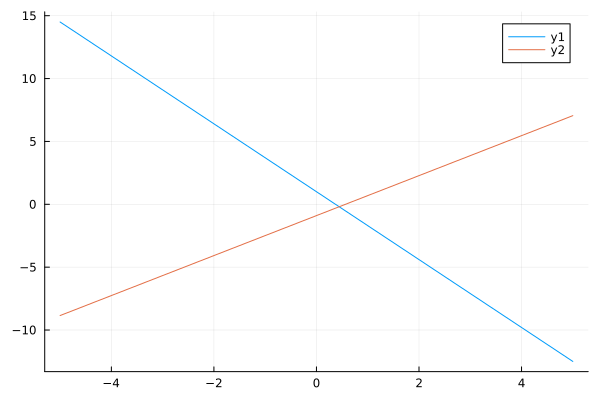

In [42]:
plot(f)
plot!(g)

In [43]:
I = interval(0,1)
xk = interval(0,1)
TesteOPN(f,I,tol = 2^-10)

[0.37037, 0.370371]

In [44]:
I = interval(0,1)
xk = interval(0,1)
TesteOPN(g,I,tol = 2^-10)

[0.566037, 0.566038]

In [45]:
I10 = [I.lo + ((interval(i, i+1))/10)*(I.hi-I.lo) for i in 0:9]


10-element Vector{Interval{Float64}}:
 [0, 0.100001]
    [0.0999999, 0.200001]
    [0.199999, 0.300001]
    [0.299999, 0.400001]
    [0.399999, 0.5]
    [0.5, 0.600001]
    [0.599999, 0.700001]
    [0.699999, 0.800001]
    [0.799999, 0.900001]
    [0.899999, 1]

In [46]:
I10[1]

[0, 0.100001]

In [57]:
I10[1].hi

0.1

In [52]:
h(x) = f(x) - I10[1].hi

h (generic function with 1 method)

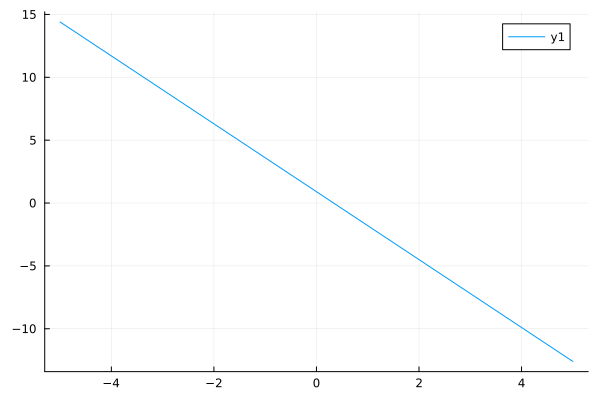

In [53]:
plot(h)

In [54]:
I = interval(-1,0.2)
xk = interval(-1,0.2)
TesteOPN(h,I,tol = 2^-10)

"Not Zeros in these interval!"

In [61]:
I = interval(0,1)
xk = interval(0,1)
TesteOPN(f,I,tol = 2^-10)

[0.37037, 0.370371]

In [56]:
I = interval(0,1)
xk = interval(0,1)
TesteOPN(h,I,tol = 2^-10)

[0.333333, 0.333334]

In [58]:
function PREIMA(f, df, I::Interval)
    m = @interval mid(I)
    return (hull(m) - hull(f(m)-I10[1].hi)/hull(df(I))) ∩ I
end

PREIMA (generic function with 1 method)

In [59]:
function TestePREIMA(f::Function, I::Interval; tol = 2^-10)
    df(I) = ForwardDiff.derivative(f,I)
    if PREIMA(f, df, xk) == ∅
        return "Not Zeros in these interval!"
    else
        while diam(xk)>tol
            zerobox = IntervalBox(xk, f(I))
            global xk = PREIMA(f, df, xk)
            if xk == ∅
                return "Not Zeros in these interval!"
            end
            @show xk
        end
    end  
    @show xk  
end

TestePREIMA (generic function with 1 method)

In [60]:
I = interval(0,1)
xk = interval(0,1)
TestePREIMA(f,I,tol = 2^-10)

[0.333333, 0.333334]